In [2]:
import torch
import torchvision.models as models
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [5]:

base=time.time()
model=models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()
print('{:.1f} model loaded'.format(time.time()-base))

23.1 model loaded


In [50]:



base=time.time()
from PIL import Image
from torchvision import transforms

input_image = Image.open('a.jpg')
#input_image = Image.open(r'.\CrackForest\Images\001.jpg')
input_image=input_image.resize((240,320))

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('{:.1f} image processed'.format(time.time()-base))


0.2 image processed


In [39]:


base=time.time()
with torch.no_grad():
    output = model(input_batch)['out'][0]


print('{:.1f} model predicted'.format(time.time()-base))
# create a color pallette, selecting a color for each class
output.shape


1.7 model predicted


torch.Size([21, 320, 240])

In [40]:
output

tensor([[[10.4898, 10.4898, 10.4898,  ..., 10.6074, 10.6074, 10.6074],
         [10.4898, 10.4898, 10.4898,  ..., 10.6074, 10.6074, 10.6074],
         [10.4898, 10.4898, 10.4898,  ..., 10.6074, 10.6074, 10.6074],
         ...,
         [ 9.5785,  9.5785,  9.5785,  ...,  8.1371,  8.1371,  8.1371],
         [ 9.5785,  9.5785,  9.5785,  ...,  8.1371,  8.1371,  8.1371],
         [ 9.5785,  9.5785,  9.5785,  ...,  8.1371,  8.1371,  8.1371]],

        [[-0.2921, -0.2921, -0.2921,  ..., -0.1744, -0.1744, -0.1744],
         [-0.2921, -0.2921, -0.2921,  ..., -0.1744, -0.1744, -0.1744],
         [-0.2921, -0.2921, -0.2921,  ..., -0.1744, -0.1744, -0.1744],
         ...,
         [-1.0044, -1.0044, -1.0044,  ..., -0.5717, -0.5717, -0.5717],
         [-1.0044, -1.0044, -1.0044,  ..., -0.5717, -0.5717, -0.5717],
         [-1.0044, -1.0044, -1.0044,  ..., -0.5717, -0.5717, -0.5717]],

        [[-2.0153, -2.0153, -2.0153,  ..., -2.2364, -2.2364, -2.2364],
         [-2.0153, -2.0153, -2.0153,  ..., -2

In [ ]:
output

In [41]:
output_predictions = output.argmax(0)
output_predictions

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [35]:
np.unique(output_predictions)

NameError: name 'np' is not defined

In [42]:
output_predictions = output.argmax(0)
out=output_predictions.detach().cpu().numpy()
out.shape

(320, 240)

In [44]:
import numpy as np
np.unique(out)

array([ 0,  9, 15, 20], dtype=int64)

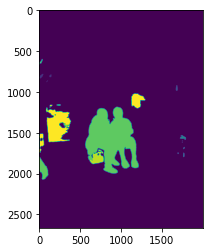

In [22]:
plt.imshow(output_predictions)

In [185]:
import torch
tmodel=torch.load('FloorExp\weights.pt')
tmodel.eval()

), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (3): Bottleneck(
        (conv1): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (layer3): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [186]:
base=time.time()
from PIL import Image
from torchvision import transforms

input_image = Image.open('a.jpg')
#input_image = Image.open(r'.\CrackForest\Images\001.jpg')
input_image=input_image.resize((320,240))

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print('{:.1f} image processed'.format(time.time()-base))

0.2 image processed


In [188]:
import time
base=time.time()
with torch.no_grad():
    output = tmodel(input_batch)['out'][0]


print('{:.1f} model predicted'.format(time.time()-base))
# create a color pallette, selecting a color for each class


1.6 model predicted


In [189]:
from torch import nn
m=nn.Sigmoid()
predicted=m(output)
predicted=predicted.detach().cpu().numpy()
predicted

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)

In [190]:
predicted.shape

(1, 240, 320)

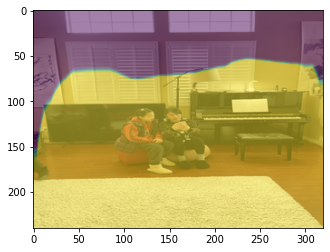

In [195]:
import matplotlib.pyplot as plt
conpredicted=predicted.copy()
threshold=0.6
conpredicted[conpredicted>=threshold]=1
conpredicted[conpredicted<threshold]=0

plt.imshow(np.asarray(input_image))
plt.imshow(np.squeeze(predicted),alpha=0.5)

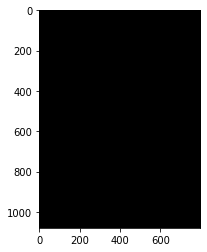

In [10]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)


In [90]:
from torch import nn
m = nn.Sigmoid()
loss = nn.BCELoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(m(input), target)
output.backward()
print(input,target)

tensor([-1.2926, -0.9919, -0.9192], requires_grad=True) tensor([0., 1., 0.])


In [94]:
output

tensor(0.6285, grad_fn=<BinaryCrossEntropyBackward>)

In [71]:
from math import e
def softmax(x):
    a=pow(e,-x)
    return 1.0/(1+a)
from math import log
log(softmax(3))

-0.04858735157374214

In [77]:
for i in range(10):
    x=i/1000.
    y=log(softmax(x))
    print("x,y:{:.1f}, {:.2f}".format(x,y))

x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69
x,y:0.0, -0.69


In [5]:
import torch

target = torch.randint(0, 10, (10,))
one_hot = torch.nn.functional.one_hot(target)
print(target)

tensor([1, 9, 2, 2, 9, 1, 6, 3, 3, 9])


In [23]:
import numpy as np
label=np.asarray([2,3,1])
label=torch.from_numpy(label)
label=label.to(torch.int64)
print(label)
label_one_hot=torch.nn.functional.one_hot(label,8)
print(label_one_hot)

tensor([2, 3, 1])
tensor([[0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]])


In [64]:
a=np.random.random((3,3))
b=np.random.random((3,3))
x=np.array([a,b])
x=np.einsum('ijk->jki',x)
np.set_printoptions(precision=2)
print("a:",a)
print("b:",b)
print("x:",x)
print(x.shape)
print("x_0 and a",x[:,:,0])
print(a)


a: [[0.94 0.1  0.16]
 [0.72 0.44 0.41]
 [0.45 0.06 0.84]]
b: [[0.02 0.97 0.5 ]
 [0.69 0.75 0.  ]
 [0.94 0.59 0.32]]
x: [[[0.94 0.02]
  [0.1  0.97]
  [0.16 0.5 ]]

 [[0.72 0.69]
  [0.44 0.75]
  [0.41 0.  ]]

 [[0.45 0.94]
  [0.06 0.59]
  [0.84 0.32]]]
(3, 3, 2)
x_0 and a [[0.94 0.1  0.16]
 [0.72 0.44 0.41]
 [0.45 0.06 0.84]]
[[0.94 0.1  0.16]
 [0.72 0.44 0.41]
 [0.45 0.06 0.84]]


In [84]:
predicted=np.reshape(x,[-1,2])
predicted=torch.from_numpy(predicted)
predicted


tensor([[0.9438, 0.0242],
        [0.0952, 0.9732],
        [0.1616, 0.5026],
        [0.7232, 0.6908],
        [0.4419, 0.7470],
        [0.4075, 0.0018],
        [0.4537, 0.9363],
        [0.0585, 0.5896],
        [0.8439, 0.3201]], dtype=torch.float64)

In [78]:
label=np.array([[0., 1., 0.],
       [1., 1., 0.],
       [0., 1., 0.]])
label=np.reshape(label,(-1,))
label

array([0., 1., 0., 1., 1., 0., 0., 1., 0.])

In [79]:
label=torch.from_numpy(label)
label=label.to(torch.int64)
label_o=torch.nn.functional.one_hot(label,2)
label_o

tensor([[1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0]])

In [87]:
label_o.to(torch.float)

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.]])

In [85]:
print(label_o.shape)
print(predicted.shape)

torch.Size([9, 2])
torch.Size([9, 2])


In [93]:
label_o[0]
predicted[0]

tensor([0.9438, 0.0242], dtype=torch.float64)

In [92]:
loss=torch.nn.CrossEntropyLoss()
output=loss(predicted[0],label_o[0])
output

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [ ]:
CAT, NOT CAT
LABEL=CAT:  [1 0]
OR Y=1


In [111]:
x=np.array([100,105])
from math import e,log
t=[pow(e,x[0]),pow(e,x[1])]
sft=(t[0]/(t[0]+t[1]),t[1]/(t[0]+t[1]))
sig=[1/(1+pow(e,-x[0])),1/(1+pow(e,-x[1]))]
print(x,t,sft,sig)
label=[1,0]
sftloss=-log(sft[0])
sftloss

[100 105] [2.6881171418161212e+43, 3.989519570547194e+45] (0.006692850924284857, 0.993307149075715) [1.0, 1.0]


5.006715348489118

In [114]:
x=-23
sig=1./(1+pow(e,-x))
sig

1.0261879630648841e-10

In [115]:
label=[1,0]
sftloss=-log(sig)
sftloss

23.000000000102617

In [110]:
sigloss=-log(1)
sigloss

-0.0

In [ ]:
-ylogy+(Y-1)LOG(1-Y)

In [117]:
masks=np.array([[[0., 0., 0.],
                 [0., 1., 1.],
                 [0., 1., 1.]]])


In [ ]:
mas

In [147]:
#BCE loss test
masks=np.array([[[0., 0., 0.],
                 [0., 255., 255.],
                 [0., 255., 255.]],[[0., 0., 0.],
                 [0., 1., 1.],
                 [0., 1., 1.]]])

outputs=np.array([[[-180., -180., -180.],
                 [-1800., 118.6, 118.],
                 [-1800., 118.,118.]],[[-180., -180., -180.],
                 [-1800., 118.6, 118.],
                 [-1800., 118.,118.]]])

masks=torch.from_numpy(masks)
outputs=torch.from_numpy(outputs)
masks[masks>0]=1
masks

tensor([[[0., 0., 0.],
         [0., 1., 1.],
         [0., 1., 1.]],

        [[0., 0., 0.],
         [0., 1., 1.],
         [0., 1., 1.]]], dtype=torch.float64)

In [148]:
from torch import nn
criterion=nn.BCELoss()
m=nn.Sigmoid()
loss=criterion(m(outputs),masks)
loss

tensor(0., dtype=torch.float64)